In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [13]:
# Step 1: Collect the relevant data
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

frog


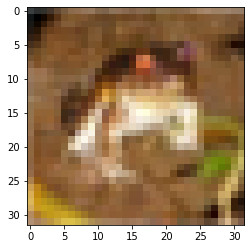

In [14]:
plt.imshow(training_images[0])

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(class_names[training_labels[0][0]])

In [15]:
# Step 2: Choose a suitable models -> CNN
# Step 3: Define the model
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten());
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [16]:
# Step 4: Optimize the model using an optimization algorithm (gradient descent)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(training_images, training_labels, batch_size=64, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
782/782 [==============================] - 115s 147ms/step - loss: 2.0583 - accuracy: 0.3692 - val_loss: 1.4621 - val_accuracy: 0.4781
Epoch 2/10
782/782 [==============================] - 102s 130ms/step - loss: 1.3541 - accuracy: 0.5161 - val_loss: 1.3347 - val_accuracy: 0.5271
Epoch 3/10
782/782 [==============================] - 100s 128ms/step - loss: 1.1827 - accuracy: 0.5809 - val_loss: 1.2450 - val_accuracy: 0.5704
Epoch 4/10
782/782 [==============================] - 97s 124ms/step - loss: 1.0597 - accuracy: 0.6268 - val_loss: 1.1549 - val_accuracy: 0.6063
Epoch 5/10
782/782 [==============================] - 103s 132ms/step - loss: 0.9533 - accuracy: 0.6676 - val_loss: 1.1463 - val_accuracy: 0.6194
Epoch 6/10
782/782 [==============================] - 104s 133ms/step - loss: 0.8703 - accuracy: 0.6982 - val_loss: 1.1153 - val_accuracy: 0.6389
Epoch 7/10
782/782 [==============================] - 96s 123ms/step - loss: 0.7912 - accuracy: 0.7234 - val_loss: 1.1689 - v

cat


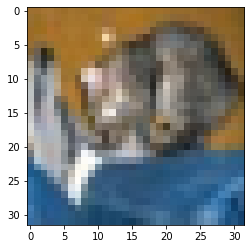

In [17]:
plt.imshow(testing_images[0])

import numpy as np

print(class_names[np.argmax(model.predict(testing_images)[0])])